<a href="https://colab.research.google.com/github/Yong-Zhuang/Tutoring/blob/main/RNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fathers of the deep learning revolution receive ACM A.M. Turing Award


![alt text](https://amturing.acm.org/images/lg_aw/3406375.jpg)

**Yoshua Bengio**

**Probabilistic models of sequences:** In the 1990s, Bengio combined neural networks with probabilistic models of sequences, such as hidden Markov models. These ideas were incorporated into a system used by AT&T/NCR for reading handwritten checks, were considered a pinnacle of neural network research in the 1990s, and modern deep learning speech recognition systems are extending these concepts.

**High-dimensional word embeddings and attention:** In 2000, Bengio authored the landmark paper, “A Neural Probabilistic Language Model,” that introduced high-dimension word embeddings as a representation of word meaning. Bengio’s insights had a huge and lasting impact on natural language processing tasks including language translation, question answering, and visual question answering. His group also introduced a form of attention mechanism which led to breakthroughs in machine translation and form a key component of sequential processing with deep learning.

**Generative adversarial networks:** Since 2010, Bengio’s papers on generative deep learning, in particular the Generative Adversarial Networks (GANs) developed with Ian Goodfellow, have spawned a revolution in computer vision and computer graphics. In one fascinating application of this work, computers can actually create original images, reminiscent of the creativity that is considered a hallmark of human intelligence.

![alt text](https://amturing.acm.org/images/lg_aw/4791679.jpg)

**Geoffrey Hinton**

**Backpropagation:** In a 1986 paper, “Learning Internal Representations by Error Propagation,” co-authored with David Rumelhart and Ronald Williams, Hinton demonstrated that the backpropagation algorithm allowed neural nets to discover their own internal representations of data, making it possible to use neural nets to solve problems that had previously been thought to be beyond their reach. The backpropagation algorithm is standard in most neural networks today.

**Boltzmann Machines:** In 1983, with Terrence Sejnowski, Hinton invented Boltzmann Machines, one of the first neural networks capable of learning internal representations in neurons that were not part of the input or output.

**Improvements to convolutional neural networks:** In 2012, with his students, Alex Krizhevsky and Ilya Sutskever, Hinton improved convolutional neural networks using rectified linear neurons and dropout regularization. In the prominent ImageNet competition, Hinton and his students almost halved the error rate for object recognition and reshaped the computer vision field.

![alt text](https://amturing.acm.org/images/lg_aw/6017366.jpg)

**Yann LeCun**

**Convolutional neural networks:** In the 1980s, LeCun developed convolutional neural networks, a foundational principle in the field, which, among other advantages, have been essential in making deep learning more efficient. In the late 1980s, while working at the University of Toronto and Bell Labs, LeCun was the first to train a convolutional neural network system on images of handwritten digits. Today, convolutional neural networks are an industry standard in computer vision, as well as in speech recognition, speech synthesis, image synthesis, and natural language processing. They are used in a wide variety of applications, including autonomous driving, medical image analysis, voice-activated assistants, and information filtering.

**Improving backpropagation algorithms:** LeCun proposed an early version of the backpropagation algorithm (backprop), and gave a clean derivation of it based on variational principles. His work to speed up backpropagation algorithms included describing two simple methods to accelerate learning time.

**Broadening the vision of neural networks:** LeCun is also credited with developing a broader vision for neural networks as a computational model for a wide range of tasks, introducing in early work a number of concepts now fundamental in AI. For example, in the context of recognizing images, he studied how hierarchical feature representation can be learned in neural networks—a concept that is now routinely used in many recognition tasks. Together with Léon Bottou, he proposed the idea, used in every modern deep learning software, that learning systems can be built as complex networks of modules where backpropagation is performed through automatic differentiation. They also proposed deep learning architectures that can manipulate structured data, such as graphs.

In [ ]:
import tensorflow as tf
tf.VERSION

'1.13.1'

refer to https://colah.github.io/posts/2015-08-Understanding-LSTMs/

## Why do we need Recurrent Neural Networks (RNN)?
There is a very specific use case where RNNs are required. In order to explain RNNs you need to first understand something called a sequence. Let's talk about sequences first.

**Sequence** is a stream of data (finite or infinite) which are interdependent. Examples would be time series data, informative pieces of strings, conversations etc. In a conversation a sentence means something but the entire flow of the conversation mostly means something completely different. Also in a time series data like stock market data, a single tick data means the current price, but a full days data will show movement and allow us to take decision whether to buy or sell.

Traditional neural networks generally don’t perform well when the input data is interdependent in a sequential pattern. Traditional neural networks don’t have any sort of correlation between previous input to the next input. So all the outputs are self dependent. You need to have some bias based on your previous output. This is where RNNs shine. RNNs have in them a sense some memory about what happened earlier in the sequence of data. This helps the system to gain context. Theoretically RNNs have infinite memory, meaning they have the capability to look back indefinitely. By look back I mean all previous inputs. But practically they can only look back a last few steps. (we will discuss this later)

Just to draw a correlation with humans in general, we also don’t take in place decisions. We also base our decisions on previous knowledge on the subject. 

## Where to use a RNN?
RNNs can be used in a lot of different places. Following are a few examples where a lot of RNNs are used.

1. **Language Modelling and Generating Text**
Given a sequence of word, here we try to predict the likelihood of the next word. This is useful for translation since the most likely sentence would be the one that is correct.

2. ** Machine Translation**
Translating text from one language to other uses one or the other form of RNN. All practical day systems use some advanced version of a RNN.

3. **Speech Recognition**
Predicting phonetic segments based on input sound waves, thus formulating a word.

4. **Generating Image Descriptions**
A very big use case is to understand what is happening inside an image, thus we have a good description. This works in a combination of CNN and RNN. CNN does the segmentation and RNN then used the segmented data to recreate the description. It’s rudimentary but the possibilities are limitless.

5. **Video Tagging**
This can be used for video search where we do image description of a video frame by frame.

## Recurrent Neural Networks

Recurrent neural networks are a type of neural network where the outputs from previous time steps are fed as input to the current time step.

### Recurrent Neural Networks have loops.
![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-rolled.png =150x)

### An unrolled recurrent neural network.
![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png =750x)

### The repeating module in a standard RNN contains a single layer.
![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png =750x)

## $h_t=\tanh ({W\cdot [h_{t-1},x_t]+b}) $
## where $\tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$

## The Problem of Long-Term Dependencies

One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task, such as using previous video frames might inform the understanding of the present frame. If RNNs could do this, they’d be extremely useful. But can they? It depends.

Sometimes, we only need to look at recent information to perform the present task. For example, consider a language model trying to predict the next word based on the previous ones. If we are trying to predict the last word in “the clouds are in the **sky**,” we don’t need any further context – it’s pretty obvious the next word is going to be sky. In such cases, where the gap between the relevant information and the place that it’s needed is small, RNNs can learn to use the past information.

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-shorttermdepdencies.png =450x)

But there are also cases where we need more context. Consider trying to predict the last word in the text “I grew up in France… I speak fluent **French**.” Recent information suggests that the next word is probably the name of a language, but if we want to narrow down which language, we need the context of France, from further back. It’s entirely possible for the gap between the relevant information and the point where it is needed to become very large.

Unfortunately, as that gap grows, RNNs become unable to learn to connect the information.
![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-longtermdependencies.png =550x)

In theory, RNNs are absolutely capable of handling such “long-term dependencies.” A human could carefully pick parameters for them to solve toy problems of this form. Sadly, in practice, RNNs don’t seem to be able to learn them. 

## LSTM Networks
Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

### The repeating module in an LSTM contains four interacting layers.

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png =750x)
![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png =550x)

## Forget

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the **“forget gate layer.”** It looks at $h_{t−1}$ and$ x_t$, and outputs a number between 0 and 1 for each number in the cell state $C_{t−1}$. A 1 represents “completely keep this” while a 0 represents “completely get rid of this.”

Example of language model:  He is French, **She** is ...
Here we see a new subject **She**, we want to forget the information of  **“He”**.


![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png =750x)

## Remember

The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the **“input gate layer”** decides which values we’ll update. Next, a tanh layer creates a vector of **new candidate values, $\tilde{C̃}_t$**, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

Example of language model:  He is French, **She** is ...
We’d want to add **“She”** to the cell state, to replace the old one we’re forgetting.



![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png =750x)

## Update Memory

We multiply the old state by $f_t$, forgetting the things we decided to forget earlier. Then we add $i_t∗\tilde{C̃}_t$. This is the new candidate values, scaled by how much we decided to update each state value.

Example of language model:  He is French, **She** is ...
This is where we’d actually drop the information **“He”** and add the new information **“She”**.


![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png =750x)

## Output

The output will be based on our cell state, but will be a filtered version. 
First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. 

Then, we put the cell state through tanh (to push the values to be (-1,1)) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

Example of language model:  He is French, **She** is ...
Since it just saw a subject, it might want to output information relevant to a verb, in case that’s what is coming next. For example, it might output whether the subject is singular or plural, so that we know what form a verb should be conjugated into if that’s what follows next.



![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png =750x)

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams["legend.loc"] = 'upper left'

Using TensorFlow backend.


## Loading and Handling Time Series in Pandas

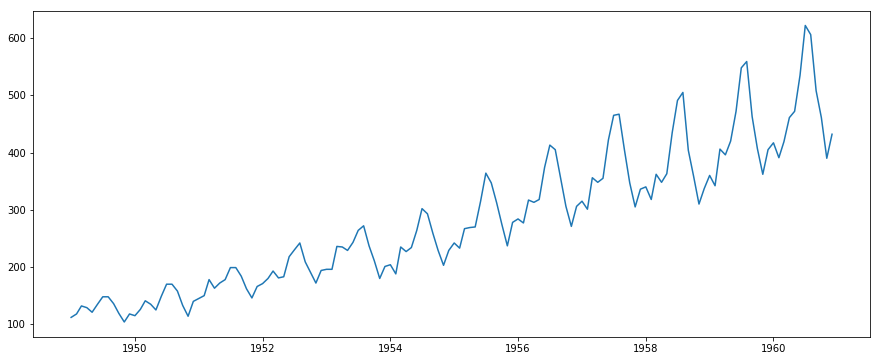

In [ ]:
url = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data = data.astype('float64')
plt.plot(data)

## Split a sequence into samples

In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence.iloc[i:end_ix].values, sequence.iloc[end_ix].values
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
n_steps = 5
X, y = split_sequence(data, n_steps)
print ('(samples, timesteps, features): '+ str(X.shape))

(samples, timesteps, features): (139, 5, 1)


### Split Dataset
We can split the dataset into three parts.

The first part is the training dataset that we will use to train our model. The second part is the validation part that we will use it to validate the perfromance of our model. The third part is the test dataset that we will pretend is not available. It is these time steps that we will treat as out of sample.

The dataset contains data from January 1949 to December 1960.

1. 1949 - 1957:**Training**
2. 1958: **Validation**
3. 1959 - 1960: **Test**

In [ ]:
X_train, y_train = X[:-36],y[:-36]
X_valid, y_valid = X[-36:-24],y[-36:-24]
X_test, y_test = X[-24:],y[-24:]
print (X_train.shape,X_valid.shape,X_test.shape)

(103, 5, 1) (12, 5, 1) (24, 5, 1)


## Build a SimpleRNN model

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


## Train model and demonstrate prediction

In [ ]:
rnn.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=200, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 103 samples, validate on 12 samples
Epoch 1/200
103/103 [==============================] - 0s 2ms/step - loss: 36704.0977 - val_loss: 65022.0820
Epoch 2/200
103/103 [==============================] - 0s 171us/step - loss: 23838.1126 - val_loss: 36081.7031
Epoch 3/200
103/103 [==============================] - 0s 157us/step - loss: 12432.4959 - val_loss: 14358.5830
Epoch 4/200
103/103 [==============================] - 0s 143us/step - loss: 3982.4453 - val_loss: 4954.2280
Epoch 5/200
103/103 [==============================] - 0s 130us/step - loss: 1621.4150 - val_loss: 9099.9014
Epoch 6/200
103/103 [==============================] - 0s 116us/step - loss: 3229.3022 - val_loss: 10305.4531
Epoch 7/200
103/103 [==============================] - 0s 121us/step - loss: 2817.4229 - val_loss: 6037.5249
Epoch 8/200
103/103 [==============================] - 0s 129us/step - loss: 1612.1563 - val_loss: 3955.4802
Epoch 9/200
103/103 [=========

In [ ]:
# make predictions
predict = rnn.predict(X_test)
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(y_test, predict))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 50.35 RMSE


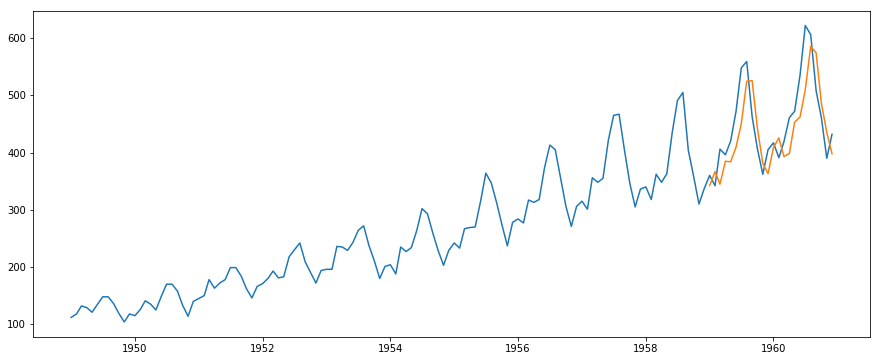

In [ ]:

predict_plot = pd.DataFrame(predict,index=data.index[-24:])
plt.plot(data)
plt.plot(predict_plot)
plt.show()